# Using Support Vector Machines to Predict Pulsar Stars

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_roc_curve, accuracy_score, f1_score, precision_score, recall_score

## Supporting functions

In [2]:
def mean(arr):
  return sum(arr)/len(arr)

def plot_results(train_x, test_x, kernels, metric):
  X_axis = np.arange(len(kernels))
  plt.bar(X_axis - 0.1, train_x, 0.2, label = 'Train')
  plt.bar(X_axis + 0.1, test_x, 0.2, label = 'Validation')

  for i in range(len(train_accuracy)):
    plt.text((X_axis[i]-0.15), (train_x[i]+0.01), str(round(train_x[i],2)))
    plt.text((X_axis[i]+0.05), (test_x[i]+0.01), str(round(test_x[i],2)))
    
  plt.xticks(X_axis, kernels)
  plt.xlabel("Kernel Type")
  plt.ylabel(metric)
  plt.legend(loc="lower center")
  plt.show()

## Preliminary data analysis

In [3]:
# Input data
# Train data
train_data = pd.read_csv("pulsar_data_train.csv")
train_data.columns = ["mean_int", "std_int", "ex_kurtosis_int", "skew_int", "mean_dm_snr", "std_dm_snr", "ex_kurtosis_dm_snr", "skew_dm_snr", "target"]
print (train_data.info())
# Test data
test_data = pd.read_csv("pulsar_data_test.csv")
test_data.columns = ["mean_int", "std_int", "ex_kurtosis_int", "skew_int", "mean_dm_snr", "std_dm_snr", "ex_kurtosis_dm_snr", "skew_dm_snr", "target"]
print (test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_int            12528 non-null  float64
 1   std_int             12528 non-null  float64
 2   ex_kurtosis_int     10793 non-null  float64
 3   skew_int            12528 non-null  float64
 4   mean_dm_snr         12528 non-null  float64
 5   std_dm_snr          11350 non-null  float64
 6   ex_kurtosis_dm_snr  12528 non-null  float64
 7   skew_dm_snr         11903 non-null  float64
 8   target              12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_int            5370 non-null   float64
 1   std_int             5370 non-null   float64
 2  

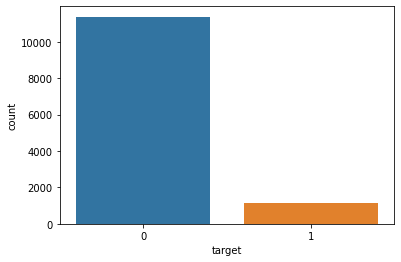

In [4]:
# Plotting the data distribution
train_data['target'] = train_data['target'].astype(int)
sns.countplot(data=train_data, x='target');

## Data cleaning and visualization

In [5]:
# Data cleaning
train_data['ex_kurtosis_int'] = train_data.groupby(['target'])['ex_kurtosis_int'].apply(lambda x:x.fillna(x.mean()))
train_data['std_dm_snr'] = train_data.groupby(['target'])['std_dm_snr'].apply(lambda x:x.fillna(x.mean()))
train_data['skew_dm_snr'] = train_data.groupby(['target'])['skew_dm_snr'].apply(lambda x:x.fillna(x.mean()))

test_data = test_data.fillna(test_data.mean())

X_train = train_data[["mean_int", "std_int", "ex_kurtosis_int", "skew_int", "mean_dm_snr", "std_dm_snr", "ex_kurtosis_dm_snr", "skew_dm_snr"]]
Y_train = train_data['target']

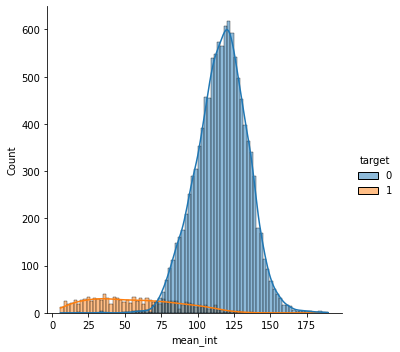

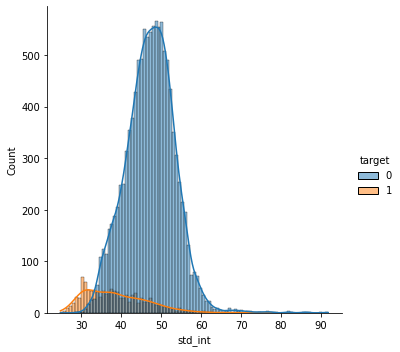

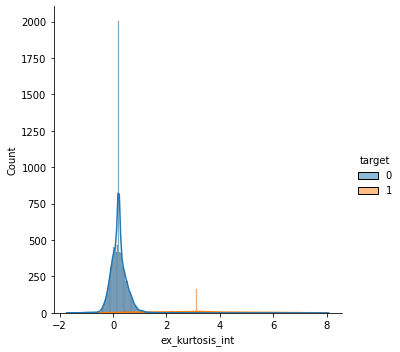

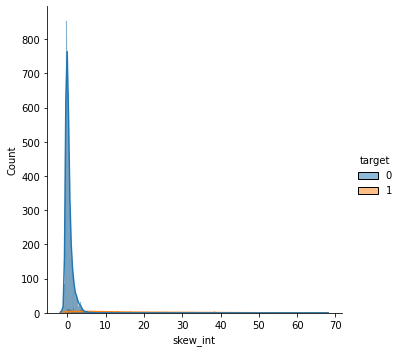

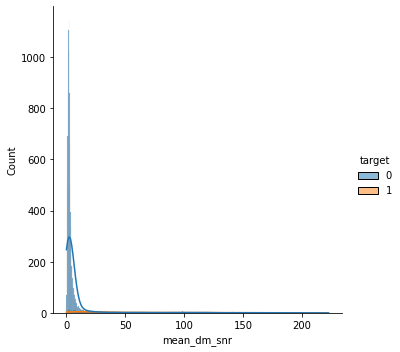

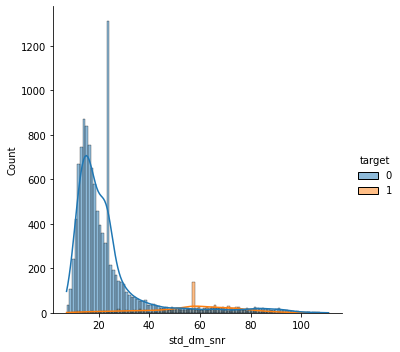

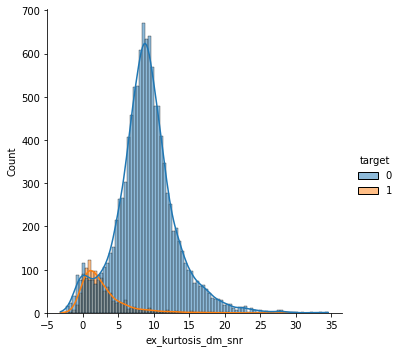

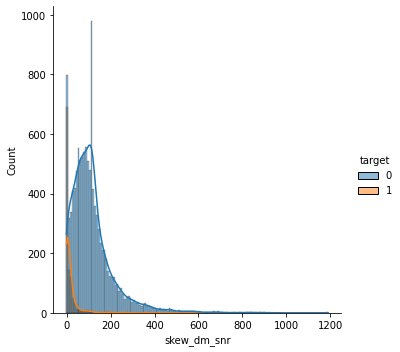

In [6]:
# Data Visualization
for column in train_data.columns:
  if column!='target':
    sns.displot(data=train_data, x=column, kde=True, hue="target");

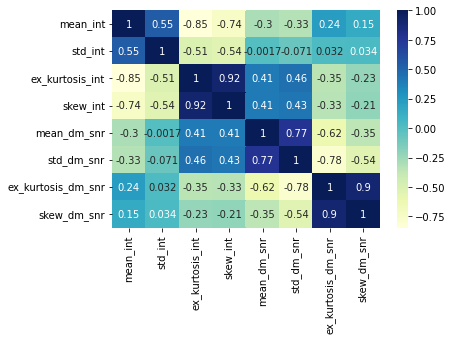

In [7]:
datamap = sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

## Tuning the best model

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


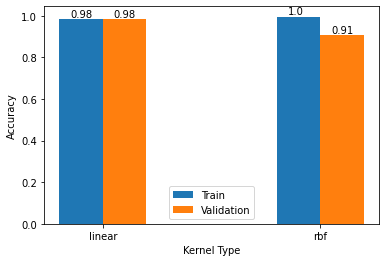

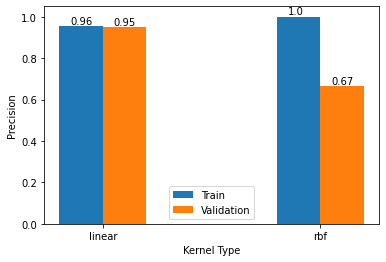

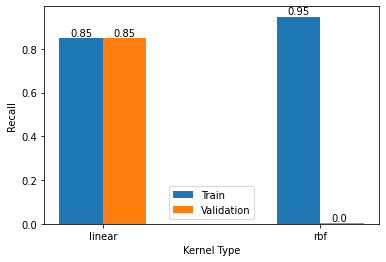

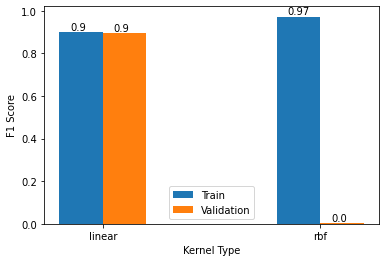

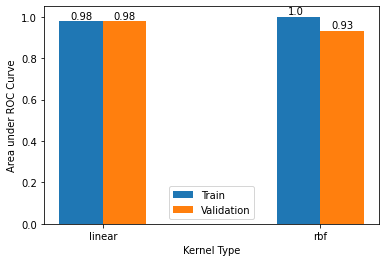

In [8]:
# Fitting various models
kernels = ['linear', 'rbf']
train_accuracy = []
test_accuracy = []
train_f1 = []
test_f1 = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_roc_auc = []
test_roc_auc = []
for kernel in kernels:
  clf = SVC(kernel=kernel, gamma='auto', degree=2)
  cv_results = cross_validate(clf, X_train, Y_train, cv=3, scoring=('accuracy','f1', 'precision', 'recall', 'roc_auc'), return_train_score=True)
  train_accuracy.append(mean(cv_results['train_accuracy']))
  test_accuracy.append(mean(cv_results['test_accuracy']))
  train_f1.append(mean(cv_results['train_f1']))
  test_f1.append(mean(cv_results['test_f1']))
  train_precision.append(mean(cv_results['train_precision']))
  test_precision.append(mean(cv_results['test_precision']))
  train_recall.append(mean(cv_results['train_recall']))
  test_recall.append(mean(cv_results['test_recall']))
  train_roc_auc.append(mean(cv_results['train_roc_auc']))
  test_roc_auc.append(mean(cv_results['test_roc_auc']))

# Plotting the results of various models
plot_results(train_accuracy, test_accuracy, kernels, "Accuracy")
plot_results(train_precision, test_precision, kernels, "Precision")
plot_results(train_recall, test_recall, kernels, "Recall")
plot_results(train_f1, test_f1, kernels, "F1 Score")
plot_results(train_roc_auc, test_roc_auc, kernels, "Area under ROC Curve")

## Analysing the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


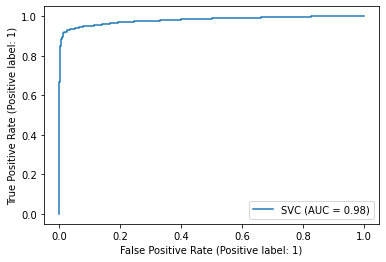

In [9]:
# Understanding the best model
clf = SVC(kernel='linear', gamma='auto')
clf.fit(X_train, Y_train)
plot_roc_curve(clf, X_train, Y_train);

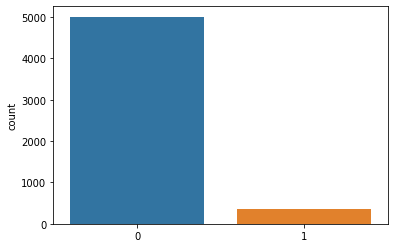

In [10]:
# Making predictions with the chosen model
X_test = test_data[["mean_int", "std_int", "ex_kurtosis_int", "skew_int", "mean_dm_snr", "std_dm_snr", "ex_kurtosis_dm_snr", "skew_dm_snr"]]
Y_pred = clf.predict(X_test)
sns.countplot(x = Y_pred);

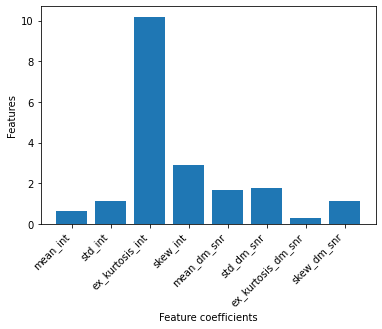

In [11]:
# Quantifying variable importance
X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())

clf = SVC(kernel='linear', gamma='auto')
clf.fit(X_train, Y_train)

importance = clf.coef_.tolist()[0]
for i in range(len(importance)):
  if importance[i]<0:
    importance[i]*=-1
features = ["mean_int", "std_int", "ex_kurtosis_int", "skew_int", "mean_dm_snr", "std_dm_snr", "ex_kurtosis_dm_snr", "skew_dm_snr"]
plt.bar(features, importance);
plt.xticks(rotation=45, ha='right');
plt.xlabel("Feature coefficients");
plt.ylabel("Features");